# DecisionTree (árvore de decisão)

Uma árvore de decisão é um mapa dos possíveis resultados de uma série de escolhas relacionadas, que podem ser usadas tanto para conduzir diálogos informais quanto para mapear um algoritmo que prevê a melhor escolha, matematicamente. Podemos utilizá-las tanto em tarefas de classificação quanto de regressão.

Uma árvore de decisão geralmente começa com um único nó, que se divide em possíveis resultados. Cada um desses resultados leva a nós adicionais, que se ramificam em outras possibilidades. Assim, cria-se uma forma de árvore que permite realizar uma previsão para um conjunto de dados. 

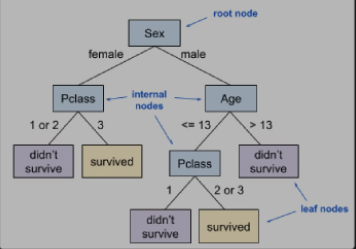

Existem três tipos de nós:
* nó inicial (raiz ou root node) -> é a primeira divisão (variável que possui maior poder preditivo)
* nós de decisão (galhos ou internal nodes) -> representam uma decisão a ser tomada
* nós de término (folhas ou leaf nodes) -> é o resultado final de um caminho de decisão

Prós:
* Interpretabilidade
* Previsões são feitas de maneira rápida

Contras: 
* Ajuste e otimização são computacionalmente caros
* Tendência ao overfitting (necessita de otimização, ou *pruning*)

### Ajuste de uma DecisionTree

O ajuste de uma árvore de decisão ocorre de forma a partir da variável independente que apresenta o maior poder preditivo, subdividindo-se dessa maneira até encontrar uma previsão.

Nesse contexto, o poder preditivo significa dividir com base em uma variável independente (x), de forma que a variável dependente (y) possa ser separada em dois subconjuntos homogêneos bem definidos, obtendo assim o maior **ganho de informação** possível.

Uma divisão é feita dividindo a base atual em dois subconjuntos, sendo um direito (condição falsa) e o outro esquerdo (condição verdadeira). A qualidade de uma divisão pode ser medida por critérios de avaliação, e é frequentemente comparada às demais possíveis divisões de forma a encontrar a melhor.

##### Impuridade de Gini

Para cada subconjunto criado em uma divisão, podemos medir o quão impuro ele é (baixo poder preditivo) com a impuridade de Gini, que é um valor entre 0 e 0.5 onde 0 = alto poder preditivo e 5 = baixo poder preditivo.

Cálculo: GINI = 2 * p * (1-p), onde:

*  p  = proporção de resultados positivos (1)
* 1-p = proporção de resultados negativos (0)

Note que quanto maior a diferença entre p e 1-p, menor é o valor do Gini (boa divisão).

##### Entropia

Outra medida da puridade de um subconjunto é a Entropia, que é um valor entre 0 e 1 onde 0 = baixo poder preditivo e 1 = alto poder preditivo. 

Cálculo: H = -[(p * np.log2(p)) + ((1-p) * log2(1-p))]

##### Ganho de Informação

Tendo em vista que o objetivo é analisar o poder preditivo da divisão de um conjunto em dois subconjuntos, calculamos o ganho de informação como sendo um valor que combina os critérios de avaliação obtidos à direita e à esquerda da divisão. Caso ambas sejam puras, o ganho de informação é alto pois explica bem a variável dependente.

Cálculo: Ganho = H(A) - [H(L) * (L/A) + H(D) * (D/A)], onde:

* H = medida de impuridade utilizada
* H(L) = impuridade do subconjunto esquerdo da divisão
* H(D) = impuridade do subconjunto direito da divisão
* H(A) = impuridade do conjunto anterior, que será dividido
* L/A = pondera o tamanho do subconjunto esquerdo em relação ao tamanho do conjunto anterior
* D/A = pondera o tamanho do subconjunto direito em relação ao tamanho do conjunto anterior

# Construindo o Algoritmo

### Importação de Bibliotecas e Manipulação dos Dados

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Exportar imagem da árvore
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Manipular dados
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../dados/titanic.csv")
df.drop(["PassengerId", "Name", "SibSp", "Ticket", "Cabin", "Embarked", "Parch"], axis = 1, inplace = True)
df["Sex"] = np.where(df["Sex"] == "male", 1, 0)
df.dropna(inplace = True)
df.head() # Alvo Binário: Survived

X = df.drop("Survived", axis = 1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Ajuste do Modelo

In [3]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

### Métricas de Avaliação

In [4]:
# Acurácia
print(accuracy_score(y_test, y_pred))

0.8244274809160306


In [5]:
# Matriz de Confusão
print(confusion_matrix(y_test, y_pred))

[[136  26]
 [ 20  80]]


In [6]:
# Métricas de Avaliação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       162
           1       0.75      0.80      0.78       100

    accuracy                           0.82       262
   macro avg       0.81      0.82      0.82       262
weighted avg       0.83      0.82      0.83       262



In [7]:
# Exportando a árvore (dá erro, porém é pouco necessário)
dot_file = export_graphviz(modelo, feature_names = X.columns)
graph = graphviz.Source(dot_file)
graph.render(filename = "tree", format = "png", cleanup = True)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

### Otimização

O grande problema das àrvores de decisão é o overfitting, quando o modelo se adapta diretamente ao conjunto de teste e perde muita capacidade de generalização. Sua otimização é feita pelo método de *pruning* (podagem), onde se estabelece restrições para a profundidade da árvore.  

Hiperparâmetros a serem otimizados: 
* max_depth -> profundidade máxima da árvore
* min_samples_leaf -> número mínimo de amostras necessárias para fazer uma nova divisão
* max_leaf_nodes -> número máximo de nós de término (folhas ou leaf nodes) gerados pela árvore